## Libs

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import matplotlib.pyplot as plt

import sys 
sys.path.append('../_jjtools')

import JJformulas as jjf
from JJ_data_processing import eng_string, show_df, calc_jj_param 

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


# Data load

## by hands

In [57]:
keys =    [             'Vo_tot', 'Rn_tot',   'Isw' , 'Ro_tot' , 'RoFF' ,    'N', 'Npar', 'dsgn',         'Ajj',  'status' ]
# unit =   [                 'V',   'ohm',     'A' ,  'ohm' ,  'ohm' ,   'ea',   'ea',     '',            'm^2', 'measd']
lst  =    {'D053N2'    : [1.610e-3,   9.3e3,    9e-8 ,  np.nan,  np.nan,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D055B1N9'  : [1.675e-3, 1.15e5, 1.53e-10, 1.006e6, 6.668e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059B6N3'  : [1.875e-3, 8.43e4, 1.98e-9 , 7.883e4, 2.591e7,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059B0N1'  : [2.178e-4, 8.75e3,  3.9e-9 , 1.314e3, 1.650e9,     2 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D059BBN2'  : [1.385e-3, 1.75e6,  3.2e-13, 2.367e8, 9.032e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D062B3N2'  : [2.495e-3, 9.93e5,  2.1e-11, 4.319e6, 8.931e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D060B2N6'  : [3.345e-3, 6.64e5,  1.2e-12, 2.292e7, 9.587e8,    20 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D060B2N2'  : [3.186e-4, 1.19e5, 2.68e-12, 2.909e7, 9.209e8,     4 ,      2,  'Fin',        0.04e-12, 'fabd' ],
           'D063BAN6_b': [5.010e-3, 5.94e5,  2.0e-11, 7.715e6, 9.350e8,    30 ,      2,  'x_s',        0.04e-12, 'fabd' ],
           'D063BAN6_a': [3.070e-3, 5.85e5,  2.2e-11, 2.650e5, 1.380e7,    30 ,      2,  'x_s',           4e-12, 'fabd' ],
           'D066B8N5_b': [1.720e-3, 6.61e4,  5.4e-9 , 8.510e2, 1.463e8,    30 ,      2,  'x_s',        0.04e-12, 'fabd' ],
           'D070B1N0'  : [  np.nan, 1.68e5,  1.6e-10, 2.373e4,  np.nan,    15 ,      2,  'x_L',           4e-12, 'measd'],
           'D079N6'    : [1.645e-4, 1.45e3, 1.37e-7 ,  2.20e0,  np.nan,     1 ,      2,  'x_L',        3.74e-12, 'measd'],
           'D079N5'    : [2.021e-3, 2.33e4,  5.6e-9 , -3.07e2,  np.nan,    15 ,      2,  'x_L',        3.74e-12, 'fabd'],
           'D074N4'    : [1.972e-3, 1.35e4,  9.0e-9 ,  1.00e0,  np.nan,     9 ,      2,  'x_L',        2.25e-12, 'measd'],
           'D078N0'    : [1.931e-3, 2.54e5, 3.71e-11,  1.00e4,  np.nan,    15 ,      2,  'x_L',           4e-12, 'measd'],
           'D078N5'    : [9.685e-5, 1.67e4,  8.0e-10,  1.00e5,  np.nan,     1 ,      2,  'x_L',           4e-12, 'measd' ],
           'D059BBN1'  : [   1e-99,   745e3,  0.6e-12,   240e6,  np.nan,    30 ,      2,  'x_L', 2.00 * 2.00e-12, 'fabd' ],
           'D059BBN2_n': [   1e-99,  1950e3,   np.nan,  np.nan,  np.nan,    30 ,      2,  'x_L', .150 * .150e-12, 'fabd' ],
           'D059BBN8'  : [   1e-99,  1780e3, 0.75e-12,    50e6,  np.nan,    30 ,      2,  'x_L', 2.00 * 2.00e-12, 'fabd' ]}


full_table = pd.DataFrame.from_dict(lst, orient='index', columns = keys )

full_table.to_excel("chain table.xlsx")

ft = full_table
show_df(ft, sort = None)

,Ajj,Isw,N,Npar,Rn_tot,RoFF,Ro_tot,Vo_tot,dsgn,status
D053N2,40.0f,90.0n,20,2,9.3k,NaN,NaN,1.6m,Fin,fabd
D055B1N9,40.0f,153.0p,20,2,115.0k,666.8M,1.0M,1.7m,Fin,fabd
D059B0N1,40.0f,3.9n,2,2,8.8k,1.6G,1.3k,217.8u,Fin,fabd
D059B6N3,40.0f,2.0n,20,2,84.3k,25.9M,78.8k,1.9m,Fin,fabd
D059BBN1,4.0p,600.0f,30,2,745.0k,NaN,240.0M,0.0y,x_L,fabd
D059BBN2,40.0f,320.0f,20,2,1.8M,903.2M,236.7M,1.4m,Fin,fabd
D059BBN2_n,22.5f,NaN,30,2,2.0M,NaN,NaN,0.0y,x_L,fabd
D059BBN8,4.0p,750.0f,30,2,1.8M,NaN,50.0M,0.0y,x_L,fabd
D060B2N2,40.0f,2.7p,4,2,119.0k,920.9M,29.1M,318.6u,Fin,fabd
D060B2N6,40.0f,1.2p,20,2,664.0k,958.7M,22.9M,3.3m,Fin,fabd


## from excel

In [7]:
ft = pd.read_excel("chain table_1.xlsx", index_col = 0)


In [8]:
ft


,Vo_tot,Rn_tot,Isw,Ro_tot,RoFF,N,Npar,dsgn,Ajj,status,wp,Iab,Ej,Ec,Ro,Rn
D053N2,1.6m,9300,90.0n,NaN,NaN,20,2.0,Fin,40.0f,fabd,4.7,611.3n,14.6,185.9m,NaN,465.0
D055B1N9,1.7m,115000,153.0p,1.0M,666.8M,20,2.0,Fin,40.0f,fabd,1.3,49.4n,1.2,185.9m,50.3k,5.8k
D059B6N3,1.9m,84300,2.0n,78.8k,25.9M,20,2.0,Fin,40.0f,fabd,1.5,67.4n,1.6,185.9m,3.9k,4.2k
D059B0N1,217.8u,8750,3.9n,1.3k,1.6G,2,2.0,Fin,40.0f,fabd,1.5,65.0n,1.5,185.9m,657.0,4.4k
D059BBN2,1.4m,1800000,310.0f,200.0M,903.2M,16,2.0,Fin,40.0f,measd_lv,299.3m,2.5n,60.2m,185.9m,12.5M,112.5k
D062B3N2,2.5m,200000,23.0p,3.6M,893.1M,15,2.0,Fin,40.0f,measd_lv,869.4m,21.3n,508.2m,185.9m,240.0k,13.3k
D060B2N6,3.3m,726000,1.2p,28.0M,958.7M,20,2.0,Fin,40.0f,measd_lv,526.9m,7.8n,186.7m,185.9m,1.4M,36.3k
D060B2N2,318.6u,122000,2.5p,28.0M,920.9M,4,2.0,Fin,40.0f,measd_lv,574.8m,9.3n,222.2m,185.9m,7.0M,30.5k
D063BAN6_b,5.0m,594000,20.0p,7.7M,935.0M,30,2.0,x_s,40.0f,fabd,713.4m,14.4n,342.2m,185.9m,257.2k,19.8k
D063BAN6_a,3.1m,585000,22.0p,265.0k,13.8M,30,2.0,x_s,4.0p,fabd,79.4m,14.6n,347.5m,2.3m,8.8k,19.5k


# Add new batch

If we fabricated a new sample and want to add the info about all sites to the database

In [5]:
keys =    [             'Rn_tot',  'N',    'Npar', 'dsgn',   'Ajj',  'status' ]

lst  =    {'D0xxN1'  : [  1e3,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN2'  : [  1e5,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN3'  : [  1e4,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN4'  : [  1e3,       2 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN5'  : [  1e6,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ],
           'D0xxN6'  : [  1e5,      20 ,      2,    'Fin',   0.04e-12, 'fabd' ]}

new_sample = pd.DataFrame.from_dict(lst, orient='index', columns = keys )


In [6]:
ft = ft.append(new_sample)

show_df(ft)


D:\anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D053N2,40.0f,185.9m,14.6,611.3n,90.0n,20,2.0,465.0,9.3k,NaN,NaN,NaN,1.6m,Fin,fabd,4.7
D055B1N9,40.0f,185.9m,1.2,49.4n,153.0p,20,2.0,5.8k,115.0k,50.3k,666.8M,1.0M,1.7m,Fin,fabd,1.3
D059B0N1,40.0f,185.9m,1.5,65.0n,3.9n,2,2.0,4.4k,8.8k,657.0,1.6G,1.3k,217.8u,Fin,fabd,1.5
D059B6N3,40.0f,185.9m,1.6,67.4n,2.0n,20,2.0,4.2k,84.3k,3.9k,25.9M,78.8k,1.9m,Fin,fabd,1.5
D059BBN1,4.0p,2.3m,272.9m,11.4n,600.0f,30,2.0,24.8k,745.0k,8.0M,NaN,240.0M,0.0y,x_L,fabd,70.4m
D059BBN2,40.0f,185.9m,60.2m,2.5n,310.0f,16,2.0,112.5k,1.8M,12.5M,903.2M,200.0M,1.4m,Fin,measd_lv,299.3m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2.0,65.0k,2.0M,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m
D059BBN3,40.0f,185.9m,64.5m,2.7n,290.0f,20,NaN,105.0k,2.1M,4.4M,NaN,87.0M,NaN,NaN,measd_lv,309.8m
D059BBN4,40.0f,185.9m,58.9m,2.5n,220.0f,20,NaN,115.0k,2.3M,10.8M,NaN,217.0M,NaN,NaN,measd_lv,296.0m
D059BBN7,40.0f,185.9m,61.3m,2.6n,210.0f,19,NaN,110.5k,2.1M,10.0M,NaN,190.0M,NaN,NaN,measd_lv,302.0m


# Calculate jj parameters

In [9]:
calc_params = calc_jj_param(ft)
ft = ft.assign(**calc_params)


ft.to_excel("chain table.xlsx")
show_df(ft)


,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D053N2,40.0f,185.9m,14.6,611.3n,90.0n,20,2.0,465.0,9300,NaN,NaN,NaN,1.6m,Fin,fabd,4.7
D055B1N9,40.0f,185.9m,1.2,49.4n,153.0p,20,2.0,5.8k,115000,50.3k,666.8M,1.0M,1.7m,Fin,fabd,1.3
D059B0N1,40.0f,185.9m,1.5,65.0n,3.9n,2,2.0,4.4k,8750,657.0,1.6G,1.3k,217.8u,Fin,fabd,1.5
D059B6N3,40.0f,185.9m,1.6,67.4n,2.0n,20,2.0,4.2k,84300,3.9k,25.9M,78.8k,1.9m,Fin,fabd,1.5
D059BBN1,4.0p,2.3m,272.9m,11.4n,600.0f,30,2.0,24.8k,745000,8.0M,NaN,240.0M,0.0y,x_L,fabd,70.4m
D059BBN2,40.0f,185.9m,60.2m,2.5n,310.0f,16,2.0,112.5k,1800000,12.5M,903.2M,200.0M,1.4m,Fin,measd_lv,299.3m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2.0,65.0k,1950000,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m
D059BBN3,40.0f,185.9m,64.5m,2.7n,290.0f,20,NaN,105.0k,2100000,4.4M,NaN,87.0M,NaN,NaN,measd_lv,309.8m
D059BBN4,40.0f,185.9m,58.9m,2.5n,220.0f,20,NaN,115.0k,2300000,10.8M,NaN,217.0M,NaN,NaN,measd_lv,296.0m
D059BBN7,40.0f,185.9m,61.3m,2.6n,210.0f,19,NaN,110.5k,2100000,10.0M,NaN,190.0M,NaN,NaN,measd_lv,302.0m


# Make pretty table

clickable label if measured

In [8]:
show_df(ft, 
         which = 'all',
         sort = 'N', 
         find = 'D062' 
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D062B3N2,40.0f,185.9m,136.5m,5.7n,21.0p,20,2.0,49.6k,993000,216.0k,893.1M,4.3M,2.5m,Fin,fabd,450.5m


In [10]:
show_df(ft, 
         which = ['Ej', 'Isw', 'Ro', 'N'],
         sort = 'Ej'
         )

,Ej,Isw,Ro,N
D059BBN4,58.9m,220.0f,10.8M,20
D059BBN2,60.2m,310.0f,12.5M,16
D059BBN7,61.3m,210.0f,10.0M,19
D059BBN3,64.5m,290.0f,4.4M,20
D059BBN2_n,104.2m,NaN,NaN,30
D059BBN8,114.2m,750.0f,1.7M,30
D060B2N7,183.1m,1.6p,10.2M,4
D060B2N6,186.7m,1.2p,1.4M,20
D060B2N2,222.2m,2.5p,7.0M,4
D059BBN1,272.9m,600.0f,8.0M,30


# Plotting

In [14]:
ft = pd.read_excel("chain table.xlsx", index_col = 0)

## as pd method

<IPython.core.display.Javascript object>


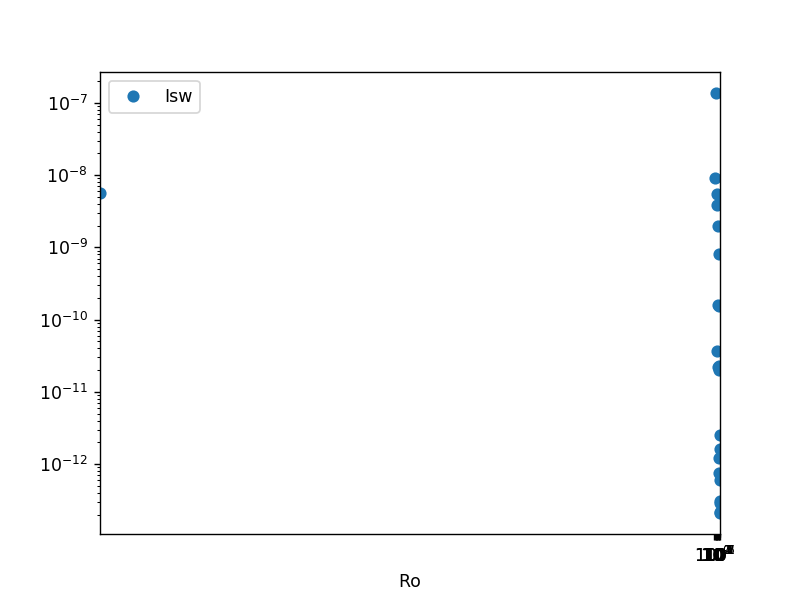

In [16]:
ax = ft.plot(x = 'Ro', y = 'Isw', marker = 'o', ls = '')

ax.set_xscale('log')
ax.set_yscale('log')

## as plt method

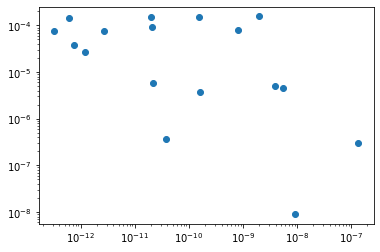

In [79]:
fig, ax = plt.subplots()
ax.plot(ft['Isw'], ft['Isw']*ft['RoZF'], 'o')

ax.set_xscale('log')
ax.set_yscale('log')

## annotation

In [42]:
7/5

1.4

<IPython.core.display.Javascript object>


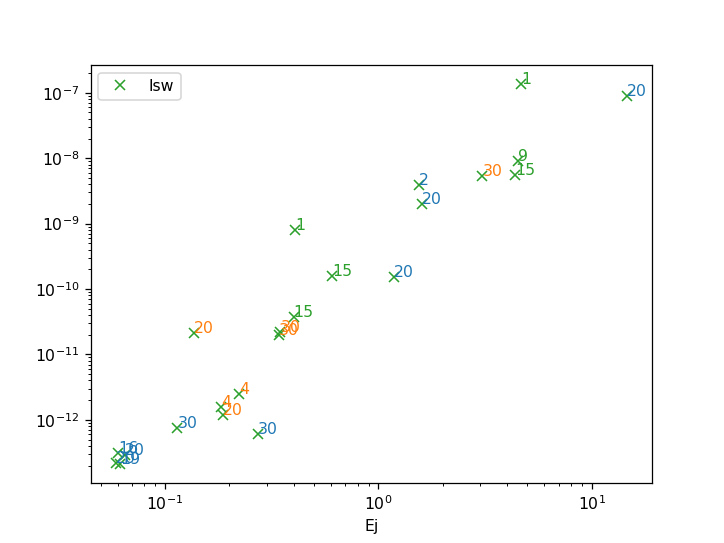

In [11]:
colormap = { 'D05' : 'C0', 'D06' : 'C1'}

ax = ft.plot( x = 'Ej', y = 'Isw', color ='C2', marker = 'x', ls = '')

for dev_name in ft.index:
    dev = ft.loc[dev_name]
    ax.annotate( dev['N'], ( dev['Ej'], dev['Isw']), color = colormap.get(dev_name[:3], 'C2'))
    
ax.set_xscale('log')
ax.set_yscale('log')



<IPython.core.display.Javascript object>


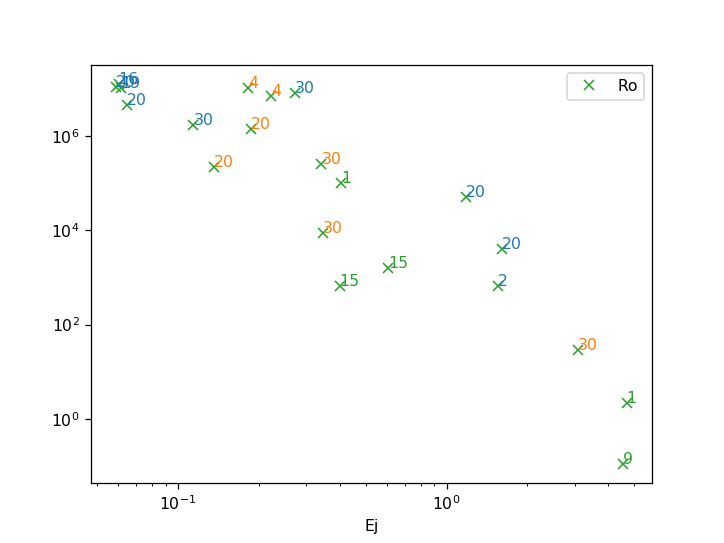

In [12]:
colormap = { 'D05' : 'C0', 'D06' : 'C1'}

ax = ft.plot( x = 'Ej', y = 'Ro', color ='C2', marker = 'x', ls = '')

for dev_name in ft.index:
    dev = ft.loc[dev_name]
    ax.annotate( dev['N'], ( dev['Ej'], dev['Ro']), color = colormap.get(dev_name[:3], 'C2'))
    
ax.set_xscale('log')
ax.set_yscale('log')

